In [53]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing some libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
df = pd.read_csv('winequality-red.csv',sep=';')

In [55]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [57]:
columns = df.columns
columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [58]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Univariate Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1F26BB5C0>,
      dtype=object)

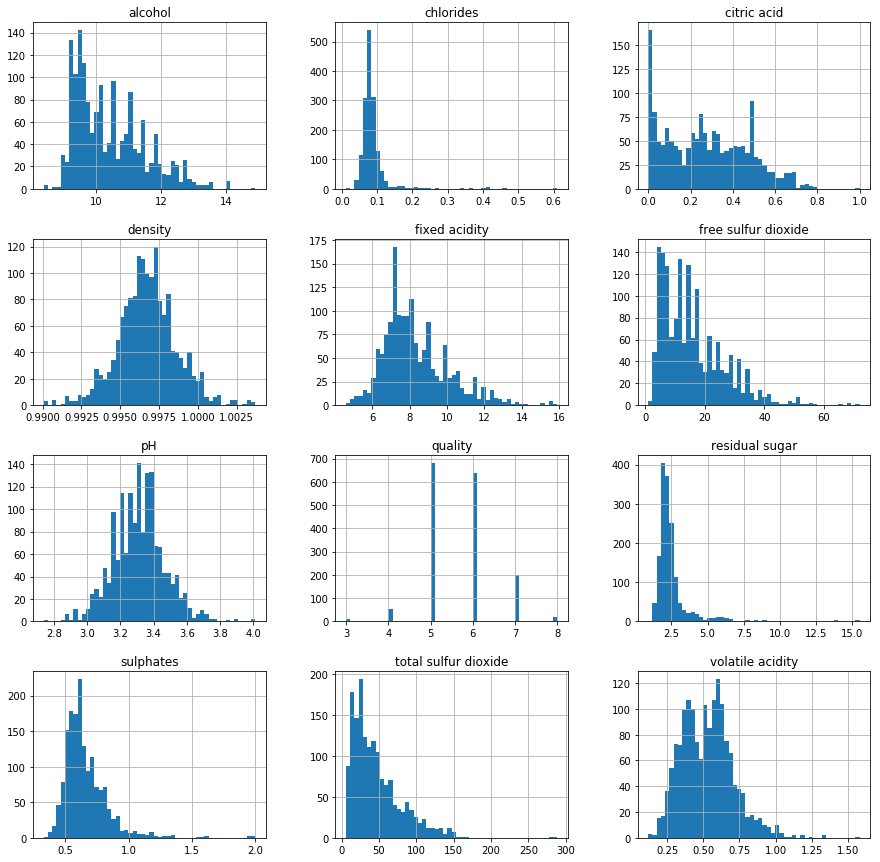

In [59]:
df.hist(bins=50, figsize=(15, 15))

Text(0.5, 1.0, 'Pie Chart showing quality distribution')

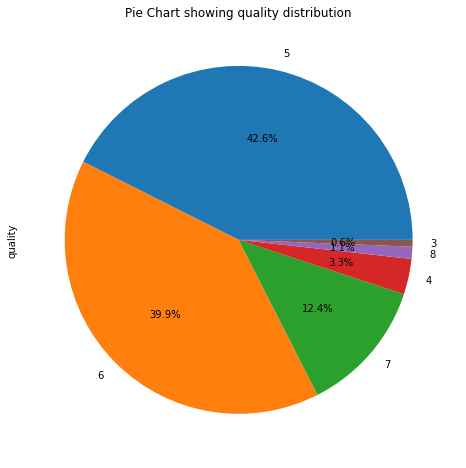

In [60]:
plt.figure(1, figsize=(8,8))
df['quality'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Pie Chart showing quality distribution')

In [79]:
def multivarient_plot(df, rows, cols, plot_type):
    """
    dataset: Dataset
    rows: Number of rows
    cols: Number of cols
    plot_type: Type of plot
    """
    
    #Retrieving the names of the columns in the data set
    column_names = df.columns.values
    #determine the number of colums
    num_of_column = len(column_names)
    
    #Row * Contains sub-chart in the dimensions of the column
    #Creating matrix. Width of matrix: 22 Height: 16
    fig, ax=plt.subplots(rows,cols, figsize=(30,25))

    counter=0 # Holds the index value in the Column_names list of the property to be drawn
    for i in range(rows):
        for j in range(cols):
            """
               axarr[i][j]: Determining the location of the plotted graph in the graph matrix
            """
            if 'violin' in plot_type:
                sns.violinplot(x='quality', y=column_names[counter],data=df, ax=ax[i][j])
            elif 'box'in plot_type :
                sns.boxplot(x='quality', y=column_names[counter],data=df, ax=ax[i][j])
            elif 'point' in plot_type:
                sns.pointplot(x='quality',y=column_names[counter],data=df, ax=ax[i][j])
            elif 'bar' in plot_type:
                sns.barplot(x='quality',y=column_names[counter],data=df, ax=ax[i][j])
                
            counter+=1
            if counter==(num_of_column-1,):
                break

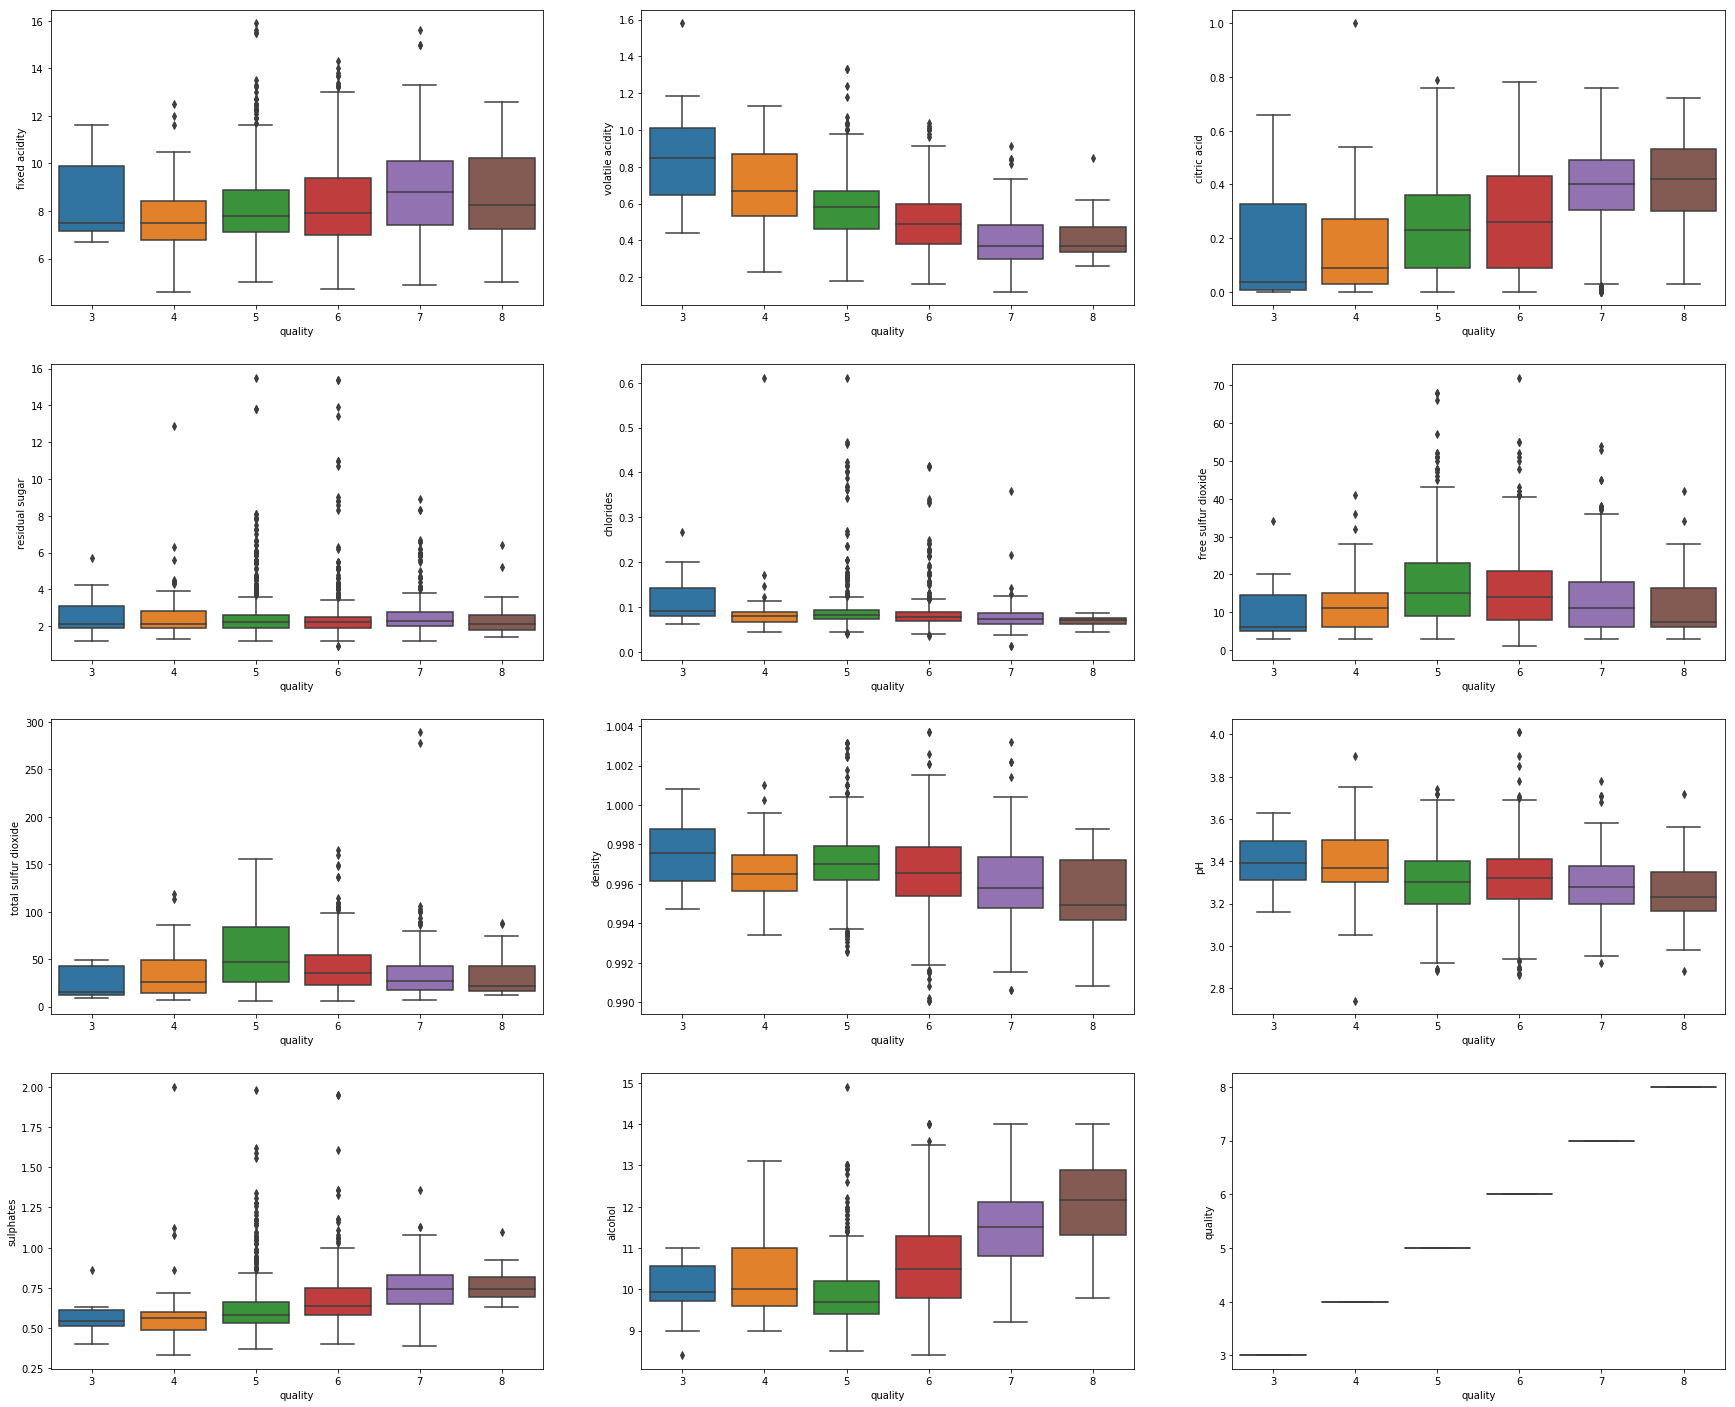

In [80]:
multivarient_plot(df,4,3,'box')

[Text(0.5, 1.0, 'Distribution plot')]

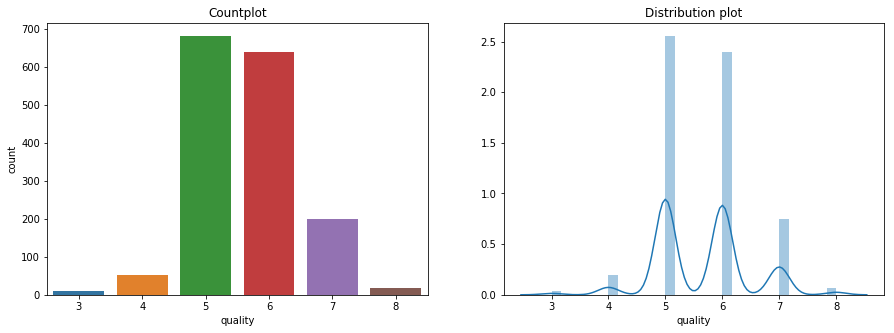

In [63]:
f, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot('quality',data=df,ax=ax[0])
sns.distplot(df['quality'],ax=ax[1])
ax[0].set(title = 'Countplot')
ax[1].set(title= 'Distribution plot')

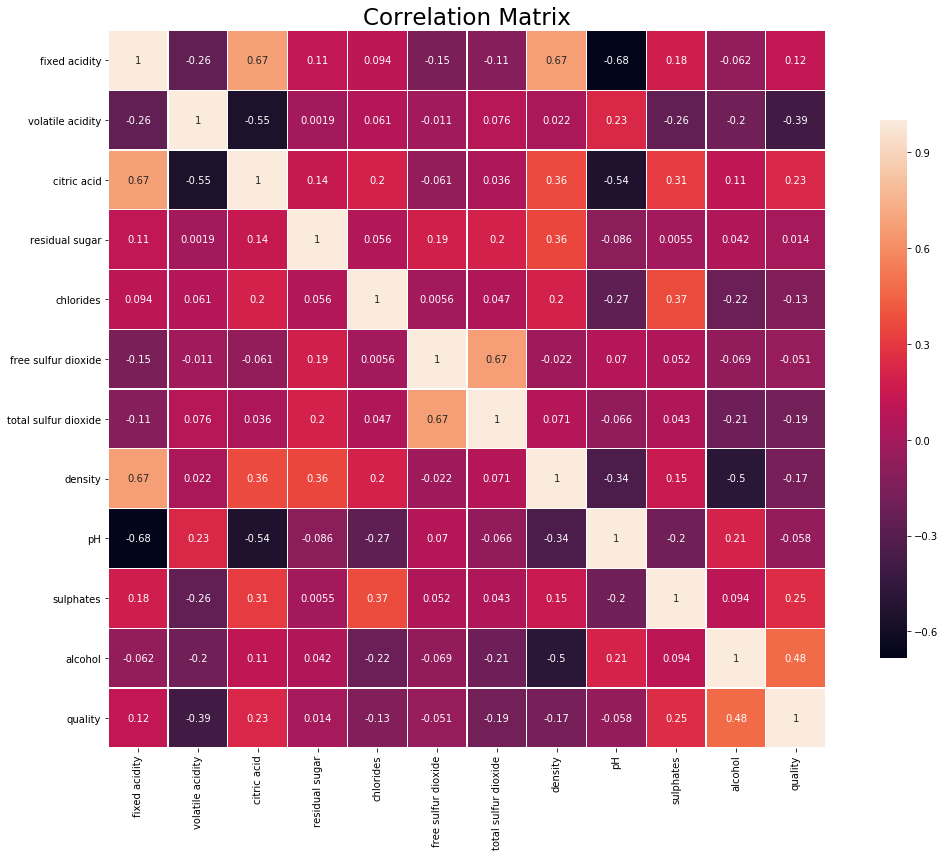

In [82]:
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix',fontsize=23)

sns.heatmap(df.corr(),linewidths=0.25, vmax=1.0, square=True,
            linecolor='w', annot=True, cbar_kws={"shrink": .75})
f.tight_layout()


In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
df1 = df.drop('quality',axis=1)

In [67]:
X = df1.iloc[:,:len(df.columns)]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [68]:
X.shape

(1599, 11)

In [69]:
X_scaled = StandardScaler().fit_transform(X)

In [70]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'SS')

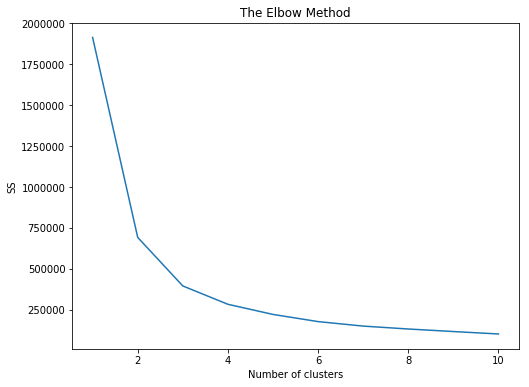

In [71]:
ss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    ss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),ss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SS')

From the elbow plot above at optimum number of clusters with minimal error = 3

In [72]:
clusterNum = 3
k_means =KMeans(n_clusters=clusterNum, n_init=12)
k_means.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [73]:
df1['klabels_3'] = k_means.labels_
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,klabels_3
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [74]:
y = k_means.predict(X)

In [75]:
centers = k_means.cluster_centers_
centers

array([[7.88755187e+00, 5.72365145e-01, 2.75643154e-01, 3.23236515e+00,
        8.83983402e-02, 2.61514523e+01, 1.08506224e+02, 9.96934730e-01,
        3.28962656e+00, 6.52033195e-01, 1.00089212e+01],
       [8.46982759e+00, 5.19519704e-01, 2.68608374e-01, 2.36102217e+00,
        8.46059113e-02, 8.99507389e+00, 2.23928571e+01, 9.96617512e-01,
        3.31137931e+00, 6.47216749e-01, 1.05769294e+01],
       [8.28699634e+00, 5.20503663e-01, 2.72435897e-01, 2.49706960e+00,
        9.13095238e-02, 2.15705128e+01, 5.48882784e+01, 9.96855769e-01,
        3.32020147e+00, 6.77106227e-01, 1.03768010e+01]])

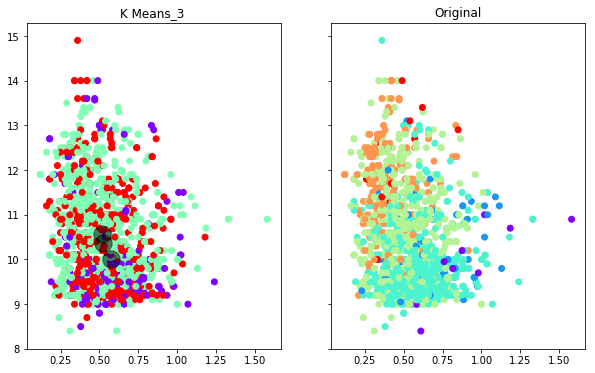

In [76]:
f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2,
                             sharey = True, figsize = (10,6))

# For fitted with kmeans 
ax1.set_title('K Means_3 ')
ax1.scatter(x = df1['volatile acidity'], y = df1['alcohol'], 
            c = df1['klabels_3'], cmap='rainbow')
ax1.scatter(x=centers[:, 1], y=centers[:, 10],
            c='black',s=300, alpha=0.5);

# For original data 
ax2.set_title("Original")
ax2.scatter(x = df['volatile acidity'], y = df['alcohol'], 
            c = df['quality'], cmap='rainbow')